In [637]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [638]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"], inplace=True)
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
5,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,5.57 MPG (AS),38.28 mpg Imp.,8.86 MPG (AS),217.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.52 L/100km,14.76 mpg Imp.,12.75 L/100 km,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,28.55 MPG (AS),2.06 liters per 100 km,18.33 km/L,246.0
8,CHEVO,SUV - STANDARD,3.6,NaN,A9,X,9.16 mpg Imp.,2.08 L/10km,26.31 L/100km,278.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.84 km per L,18.13 L/100 km,-9999,202.0


In [639]:
df.dropna(inplace=True)

In [640]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,CO2 Emissions(g/km)
count,97604.000000
mean,247.205374
std,75.272565
min,96.000000
25%,200.000000
50%,231.000000
75%,285.000000
max,822.111635


In [641]:
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV'
 'JIPU' 'CHEVO' 'ASURA' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN'
 'MITSU' 'CADILUXE' 'LAMBOGI' 'RYUNDAI']
 
['PICKUP TRUCK - STANDARD' 'MINICOMPACT' 'COMPACT' 'FULL-SIZE'
 'SUV - SMALL' 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD'
 'STATION WAGON - SMALL' 'missing' 'TWO-SEATER' 'MID-SIZE'
 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER' 'not-recorded' 'na'
 'SPECIAL PURPOSE VEHICLE' 'unspecified' 'unknown'
 'STATION WAGON - MID-SIZE' 'VAN - CARGO' 'not-available' '-1'
 'unestablished']
 
['3.5' '3.0' 'unspecified' '1.8' '2.0' '2.5' 'missing' '2.3' '5.3' '1.4'
 '2.4' '1.6' '4.4' '1.3' '6.2' '3.6' '4.8' '2.7' '6.0' '6.5' '5.7' '3.7'
 '1.2' '3.3' '1.5' '5.0' '3.2' '4.0' '5.2' 'not-recorded' 'not-available'
 '-1' 'unknown' 'na' 'unestablished' '4.3' '6.4' '4.6' '6.6' '3.8' '5.4'
 '1.0' '5.6' '5.8' '3.4' '8.4' '2.8' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' 'unspecified' 'not-recorded' '3.0' '-1'
 'missing' '5.0' 'unkno

97604

In [642]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished')].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)

for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV' 'CHEVO' 'ASURA'
 'LECUS' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN' 'JIPU' 'LAMBOGI'
 'CADILUXE' 'RYUNDAI' 'MITSU' 'BARUSU']
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
['8.64 liters per 100 km' '7.52 L/100km' '28.55 MPG (AS

75980

In [643]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

['FOLD' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV' 'CHEVO' 'ASURA'
 'LECUS' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN' 'JIPU' 'LAMBOGI'
 'CADILUXE' 'RYUNDAI' 'MITSU' 'BARUSU']
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
['8.64 liters per 100 km' '7.52 L/100km' '28.55 MPG (AS

In [644]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

MPG (AS)
L/10km
km per L
mpg Imp.
L/100 km
L/100km
km/L
liters per 100 km


In [645]:
def convert_to_km_per_l(value, unit):
    if unit=="mpg Imp.":
        return(float(value)/0.354006)
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(100/float(value))
    elif unit=="km/L" or unit=="km per L":
        return(float(value))
    elif unit=="L/10km":
        return(10/float(value))
    elif unit=="MPG (AS)":
        return(float(value)/0.4251434788508811)

In [646]:
for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
    list_temp=[]
    for record in df[col]:
        try:
            list_word=record.split(" ", 1)
            list_temp.append(convert_to_km_per_l(list_word[0], list_word[1]))
        except:
            list_temp.append(0)
    df[col] = list_temp

# for rec in list_temp:
#     print(rec)

In [647]:
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,11.574074,16.286645,106.184641,306.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.840000,5.515720,0.000000,202.0
10,TOYOTI,SUV - SMALL,2.5,4.0,AS6,X,3.606203,44.052863,0.000000,216.0
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0
17,FOLD,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0
19,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,6.609385,2.376991,20.299029,335.0
20,LAND CRAWLER,SUV - STANDARD,3.0,6.0,AS8,D,14.104372,0.000000,144.404332,247.0


In [648]:
def remove_zeros(df, column_name=""):
  df = df[df[column_name] != 0]
  df.reset_index()
  return df

In [649]:
#Removing Outliers
def remove_outliers(df, column_name=""):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR

  df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
  df.reset_index()
  df=remove_zeros(df, column_name)
  return df


In [650]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [651]:
def visualize_sorted_mean(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])

  fig, ax = plt.subplots(figsize=(7,10))
  bar_width = 0.4

  bar1 = ax.barh(np.arange(len(cols)), [dict_col[:][i][1][0] for i in range(len(dict_col))], height=bar_width, color='yellow', alpha=0.5, label='Average')
  bar2 = ax.barh(np.arange(len(cols)) + bar_width, [dict_col[:][i][1][1] for i in range(len(dict_col))], height=bar_width, color='orange', alpha=0.5, label='Median')

  ax.set_yticks(np.arange(len(cols)) + bar_width / 2)
  ax.set_yticklabels(dict_col)
  ax.set_xlabel('CO2 Emissions(g/km)')
  ax.set_ylabel(column_name)
  ax.set_title('Visualization of CO2 emissions by ' + column_name)
  ax.legend()

  plt.show()

def generate_dict(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])
  return dict_col, avg

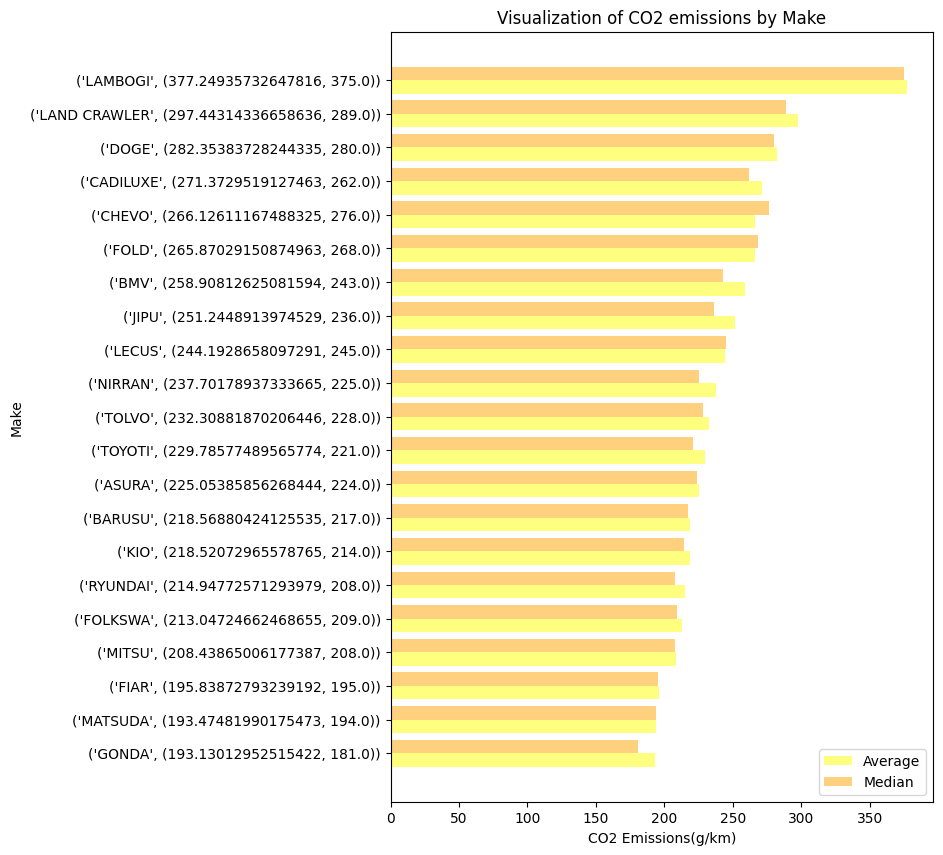

In [652]:
visualize_sorted_mean(df, "Make")

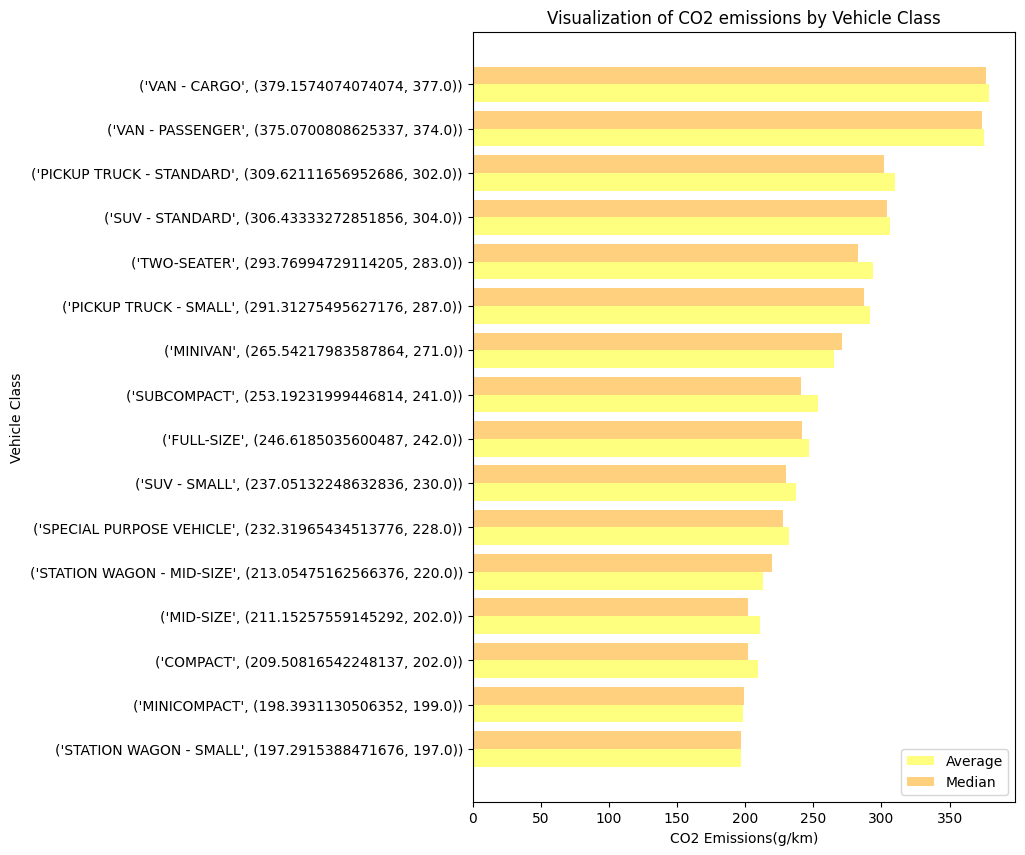

In [653]:
visualize_sorted_mean(df, "Vehicle Class")

In [654]:
def AddAvgColumn(df, column_name):
    make_map={}
    dict_col, avg=generate_dict(df, column_name)
    for i in range(len(dict_col)):
        make_map[dict_col[i][0]]=avg[i]
    new_col=column_name+"Avg"
    df[new_col]=df[column_name].map(make_map)
    # df[new_col] = (df[new_col]-df[new_col].min())/df[new_col].max()
    # df[new_col] = (df[new_col]-192.6185147143735)/271.26871156214463
    
    print(make_map)
    return df

In [655]:
df=AddAvgColumn(df, "Make")
df=AddAvgColumn(df, "Vehicle Class")
df=AddAvgColumn(df, "Transmission")
df=AddAvgColumn(df, "Fuel Type")

{'GONDA': 193.13012952515422, 'MATSUDA': 297.44314336658636, 'FIAR': 258.90812625081594, 'MITSU': 229.78577489565774, 'FOLKSWA': 265.87029150874963, 'RYUNDAI': 266.12611167488325, 'KIO': 244.1928658097291, 'BARUSU': 195.83872793239192, 'ASURA': 232.30881870206446, 'TOYOTI': 282.35383728244335, 'TOLVO': 213.04724662468655, 'NIRRAN': 237.70178937333665, 'LECUS': 251.2448913974529, 'JIPU': 214.94772571293979, 'BMV': 208.43865006177387, 'FOLD': 193.47481990175473, 'CHEVO': 225.05385856268444, 'CADILUXE': 218.52072965578765, 'DOGE': 218.56880424125535, 'LAND CRAWLER': 377.24935732647816, 'LAMBOGI': 271.3729519127463}
{'STATION WAGON - SMALL': 246.6185035600487, 'MINICOMPACT': 237.05132248632836, 'COMPACT': 253.19231999446814, 'MID-SIZE': 265.54217983587864, 'STATION WAGON - MID-SIZE': 306.43333272851856, 'SPECIAL PURPOSE VEHICLE': 209.50816542248137, 'SUV - SMALL': 197.2915388471676, 'FULL-SIZE': 293.76994729114205, 'SUBCOMPACT': 211.15257559145292, 'MINIVAN': 291.31275495627176, 'PICKUP TR

In [656]:
df.head(5)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0,193.130130,293.769947,232.318306,267.157393
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0,377.249357,197.291539,247.833952,276.532490
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0,208.438650,211.152576,181.703590,276.532490
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0,282.353837,291.312755,196.684061,267.157393
17,FOLD,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0,193.474820,232.319654,196.684061,267.157393


In [657]:
print(df['MakeAvg'].unique())

[193.13012953 377.24935733 208.43865006 282.35383728 193.4748199
 225.05385856 251.2448914  258.90812625 213.04724662 218.56880424
 265.87029151 237.70178937 214.94772571 266.12611167 229.7857749
 297.44314337 232.3088187  244.19286581 195.83872793 271.37295191
 218.52072966]


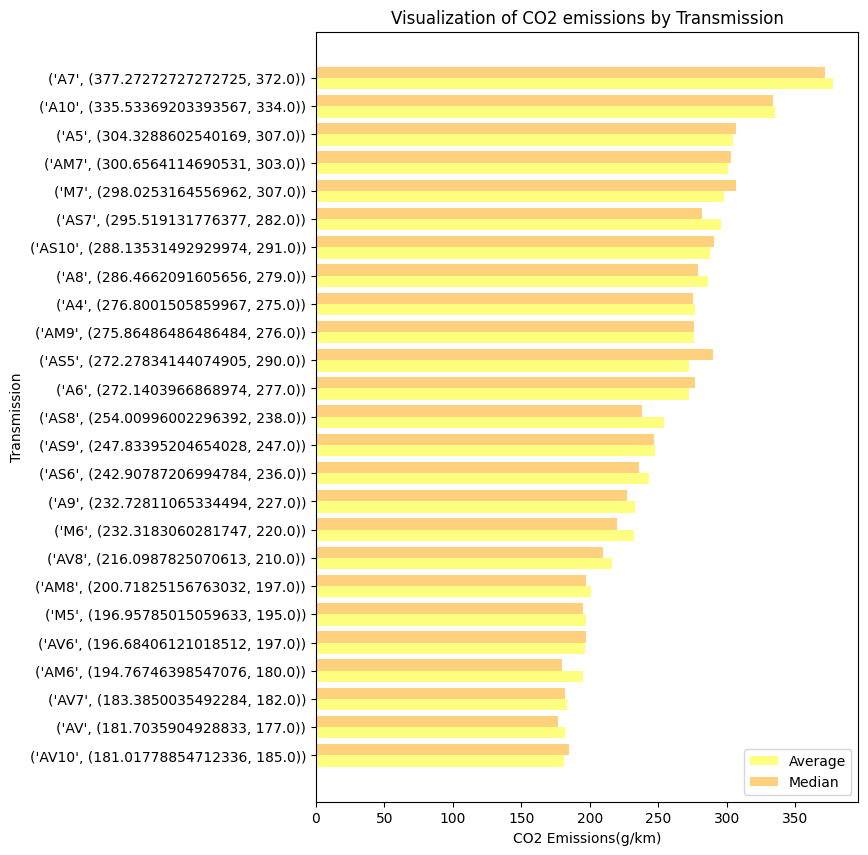

In [658]:
# col_trans=df["Transmission"].unique()
# trans_avg=[np.average(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]
# trans_median=[np.median(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]

# fig, ax = plt.subplots(figsize=(7,10))
# bar_width = 0.4

# bar1 = ax.barh(np.arange(len(col_trans)), trans_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
# bar2 = ax.barh(np.arange(len(col_trans)) + bar_width, trans_median, height=bar_width, color='orange', alpha=0.5, label='Median')

# ax.set_yticks(np.arange(len(col_trans)) + bar_width / 2)
# ax.set_yticklabels(col_trans)
# ax.set_xlabel('CO2 Emissions(g/km)')
# ax.set_ylabel('Transmission')
# ax.set_title('Visualization of CO2 emissions by Transmission')
# ax.legend()

# plt.show()
visualize_sorted_mean(df, "Transmission")


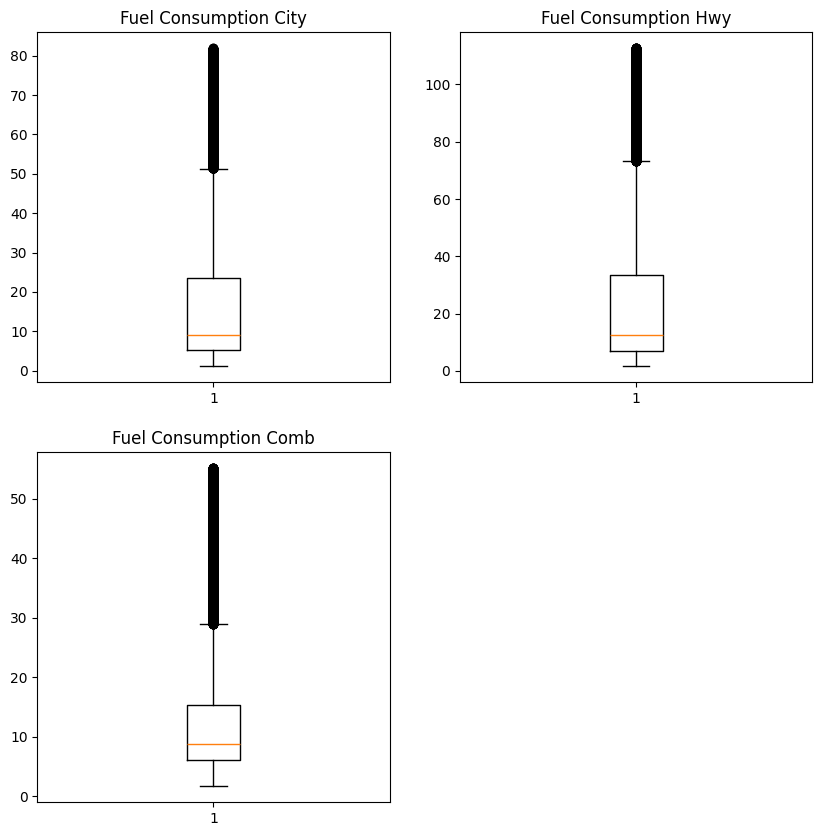

In [659]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb']
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [660]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X    30149
Z    12881
E     2434
D      974
N        8
Name: count, dtype: int64

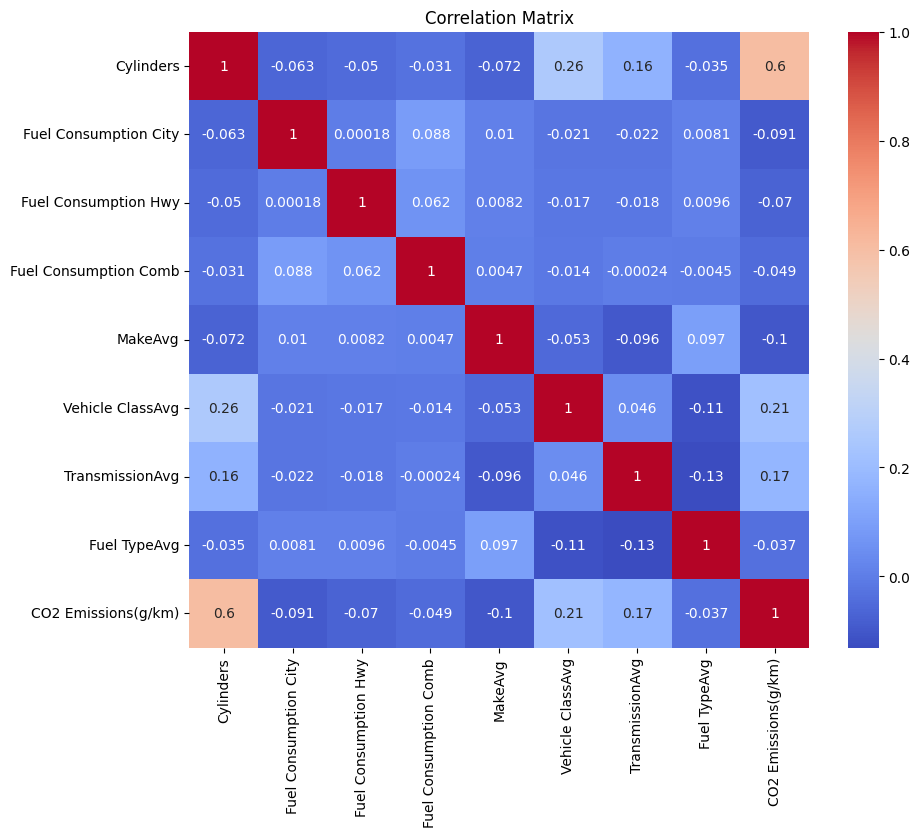

In [661]:
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
corr=df[['Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'MakeAvg',
       'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg', "CO2 Emissions(g/km)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

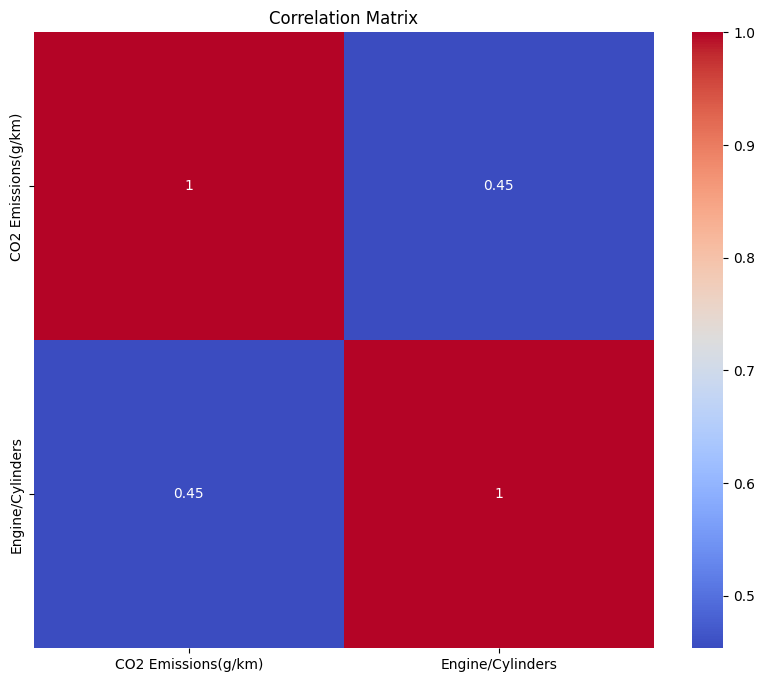

In [662]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

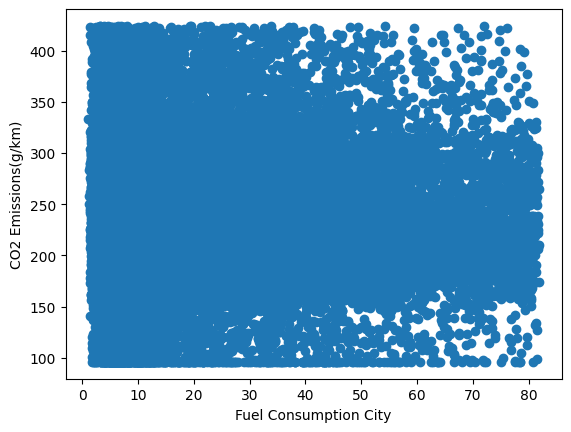

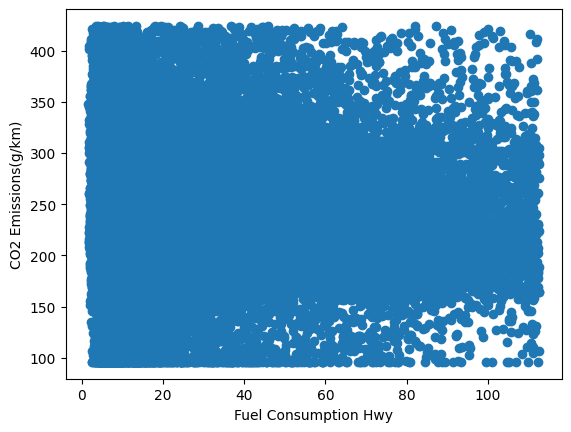

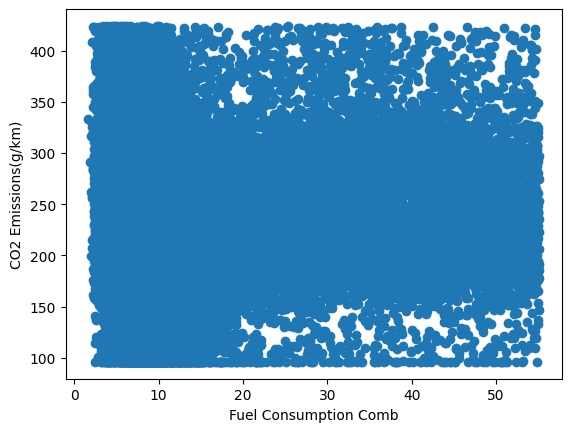

In [663]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [664]:
max(df["Fuel Consumption City"])

81.89126737964894

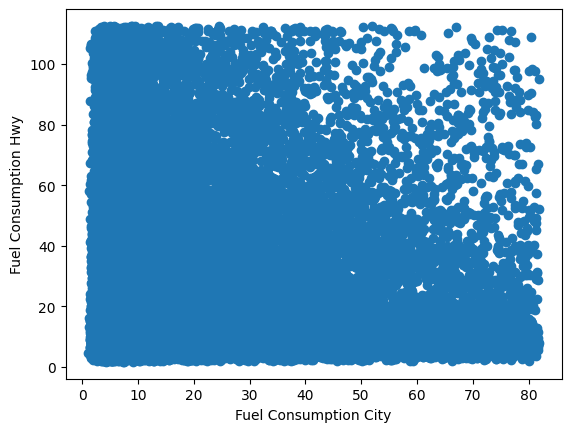

In [665]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

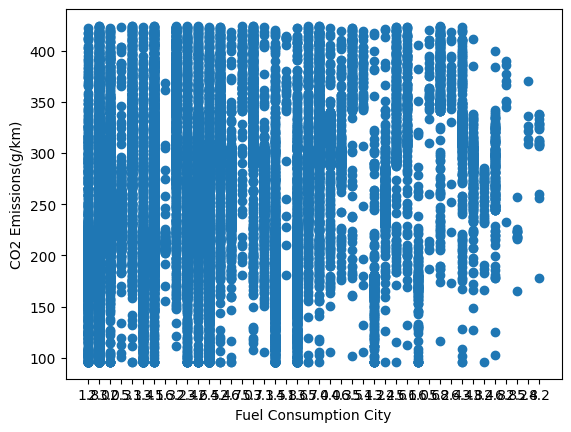

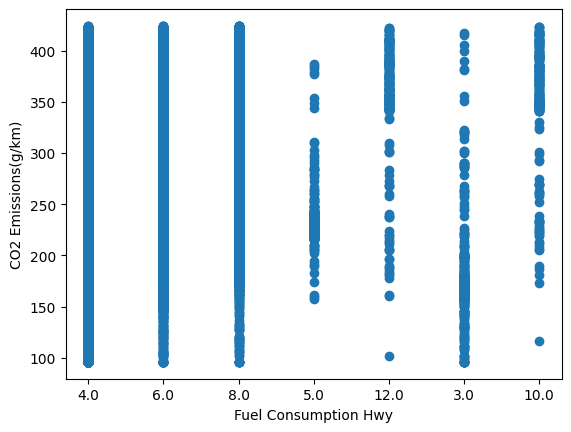

In [666]:
plt.scatter(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [667]:
print(len(df))
df.to_csv("preprocessing.csv")

46446


In [668]:
df.head(20)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0,193.130130,293.769947,232.318306,267.157393,0.450000
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0,377.249357,197.291539,247.833952,276.532490,0.500000
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0,208.438650,211.152576,181.703590,276.532490,0.500000
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0,282.353837,291.312755,196.684061,267.157393,0.500000
17,FOLD,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0,193.474820,232.319654,196.684061,267.157393,0.575000
19,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,6.609385,2.376991,20.299029,335.0,225.053859,232.319654,300.656411,267.157393,0.662500
21,CHEVO,COMPACT,1.4,4.0,AS6,X,9.210000,88.218844,10.000000,130.0,225.053859,253.192320,196.684061,267.157393,0.350000
22,GONDA,STATION WAGON - SMALL,3.5,6.0,M6,X,8.610000,11.580000,9.737098,158.0,193.130130,246.618504,181.703590,267.157393,0.583333
29,LECUS,SUV - SMALL,3.5,6.0,AS8,X,5.624297,10.720000,7.142857,259.0,251.244891,197.291539,247.833952,267.157393,0.583333
36,BMV,COMPACT,3.0,6.0,A8,Z,64.935065,16.112208,33.941483,188.0,208.438650,253.192320,295.519132,276.532490,0.500000


In [669]:
df[df["Make"]=="LAMBOGI"]

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
550,LAMBOGI,TWO-SEATER,2.5,5.0,AM7,Z,3.600000,66.128823,4.830000,385.0,271.372952,375.070081,298.025316,276.53249,0.500000
701,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,12.376238,8.149959,10.040000,365.0,271.372952,375.070081,298.025316,276.53249,0.541667
1297,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,3.475843,10.752688,5.000000,376.0,271.372952,375.070081,298.025316,276.53249,0.541667
1426,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,4.860000,4.150000,24.979802,409.0,271.372952,375.070081,298.025316,276.53249,0.541667
2140,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,37.372248,7.240000,30.813127,419.0,271.372952,375.070081,298.025316,276.53249,0.541667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135492,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,59.697493,9.285051,10.060000,343.0,271.372952,375.070081,298.025316,276.53249,0.541667
135798,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,6.770000,7.593014,7.120000,354.0,271.372952,375.070081,298.025316,276.53249,0.541667
136248,LAMBOGI,TWO-SEATER,6.5,12.0,AM7,Z,4.823927,80.620102,6.310000,343.0,271.372952,375.070081,298.025316,276.53249,0.541667
136779,LAMBOGI,TWO-SEATER,5.3,8.0,AM7,Z,5.479452,20.400000,8.196721,358.0,271.372952,375.070081,298.025316,276.53249,0.662500


In [671]:
len(df)

46446

In [670]:
df.to_csv("preprocessing_1.csv")